In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("housetrain.csv")
test=pd.read_csv("housetest.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

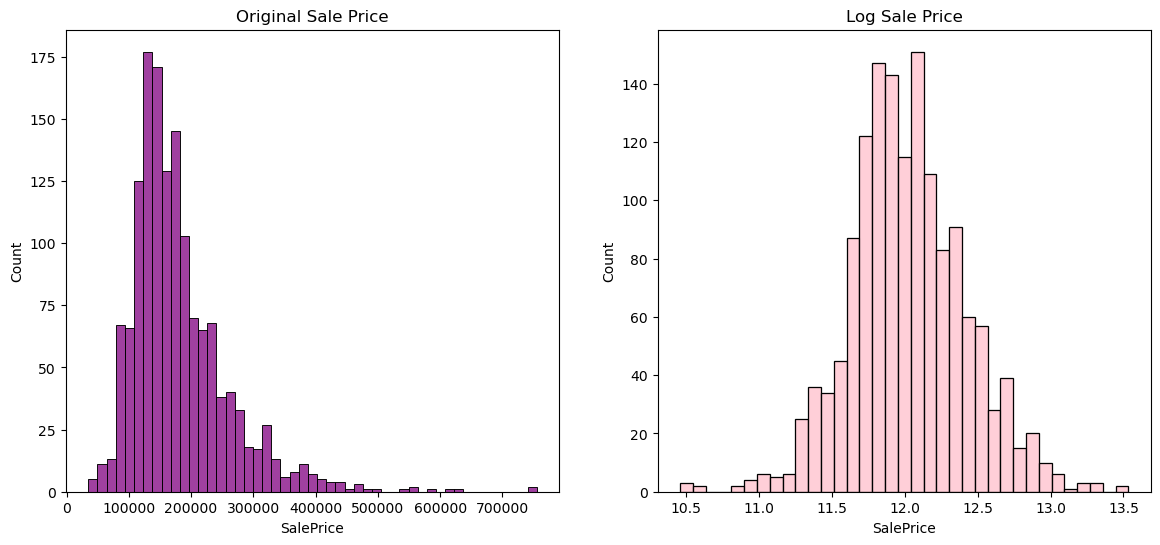

In [5]:
log_sale_price=np.log(data['SalePrice'])

fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.histplot(data['SalePrice'],ax=axes[0],kde=False,color='purple')
axes[0].set_title('Original Sale Price')
sns.histplot(log_sale_price,ax=axes[1],kde=False,color='pink')
axes[1].set_title('Log Sale Price')
plt.show()

In [6]:
numeric=data.select_dtypes(include=[np.number])
corr=numeric.corr()['SalePrice'].sort_values()
print("Lowest:\n",corr.head(5),"\nHighest:\n",corr.tail(5))

Lowest:
 KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64 
Highest:
 GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64


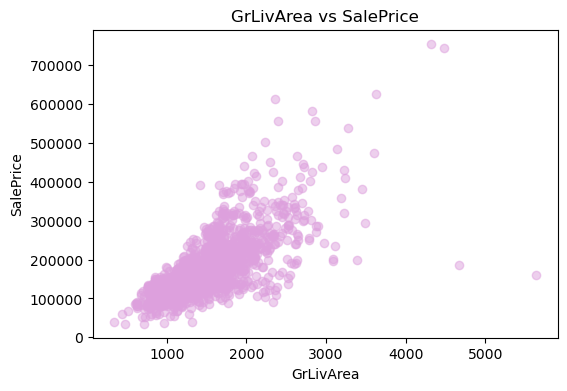

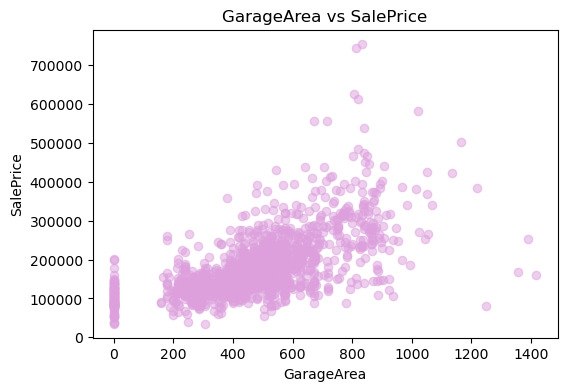

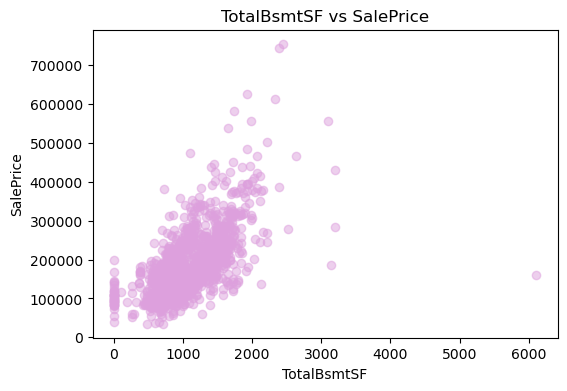

In [7]:
scatter_features=['GrLivArea','GarageArea','TotalBsmtSF']
for feat in scatter_features:
    plt.figure(figsize=(6,4))
    plt.scatter(data[feat],data['SalePrice'],alpha=0.5,color='plum')
    plt.title(f'{feat} vs SalePrice')
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

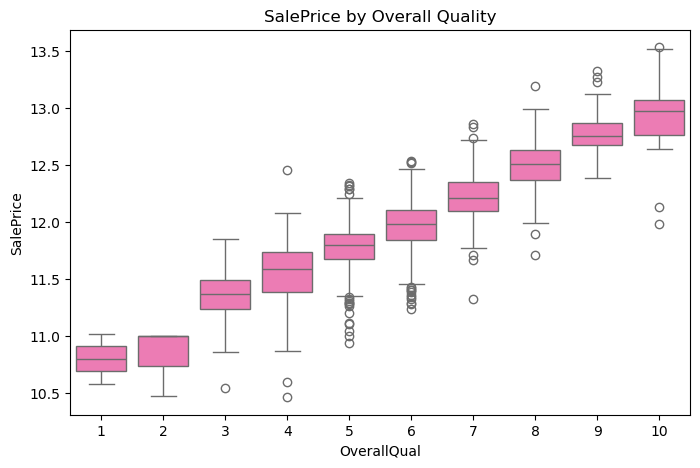

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual',y=log_sale_price,data=data,color='hotpink')
plt.title('SalePrice by Overall Quality')
plt.show()

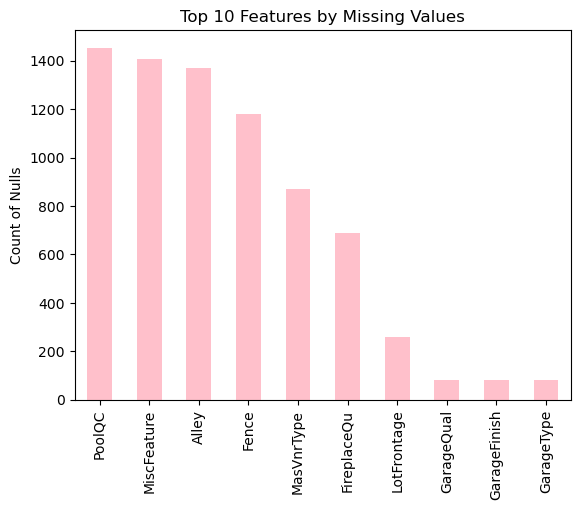

In [9]:
nulls=data.isnull().sum().sort_values(ascending=False).head(10)
nulls.plot(kind='bar',color='pink')
plt.title('Top 10 Features by Missing Values')
plt.ylabel('Count of Nulls')
plt.show()

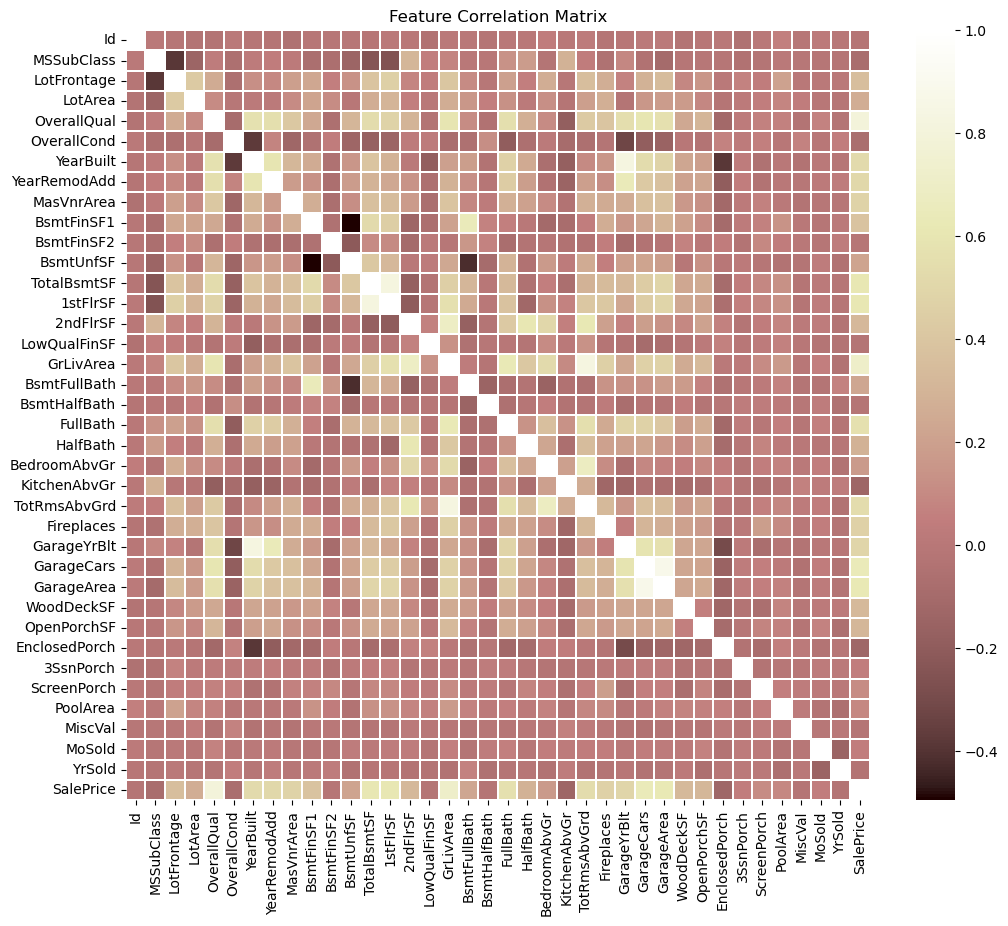

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric.corr(),cmap='pink',vmax=1.0,linewidths=0.1)
plt.title('Feature Correlation Matrix')
plt.show()

In [11]:
correlation=data.corr(numeric_only=True)['SalePrice'].sort_values()
low_correlation=correlation[abs(correlation)<0.05]
print(low_correlation)

YrSold         -0.028923
LowQualFinSF   -0.025606
Id             -0.021917
MiscVal        -0.021190
BsmtHalfBath   -0.016844
BsmtFinSF2     -0.011378
3SsnPorch       0.044584
MoSold          0.046432
Name: SalePrice, dtype: float64


In [12]:
data=data.drop(data[(data['GrLivArea']>4000)&(data['SalePrice']<300000)].index)
data=data.drop(data[(data['GarageArea']>1000)&(data['SalePrice']<300000)].index)
data=data.drop(data[(data['TotalBsmtSF']>4000)&(data['SalePrice']<300000)].index)

In [13]:
test_final=test["Id"]
def clean(data):
    data=data.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1)

    catcols=['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BmstCond','BmstExposure','BsmtFinType1','BsmtFinType2','MAsVnrType']
    for col in catcols:
        if col in data.columns:
            data[col]=data[col].fillna('None')

    numcols=['GarageYrBlt','GarageArea','GarageCars','BmstFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea']
    for col in numcols:
        if col in data.columns:
            data[col]=data[col].fillna(0)

    if 'LotFrontage' in data.columns and 'Neighborhood' in data.columns:
        data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )

    fill_numcols=data.select_dtypes(include=['float64','int64']).columns
    for col in fill_numcols:
        if data[col].isnull().sum()>0:
            data[col]=data[col].fillna(data[col].median())

    fill_catcols=data.select_dtypes(include=['object']).columns
    for col in fill_catcols:
        if data[col].isnull().sum()>0:
            data[col]=data[col].fillna(data[col].mode()[0])

    return data

In [14]:
data=clean(data)
test=clean(test)

In [15]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

cols=data.select_dtypes(include=['object']).columns

for col in cols:
    data[col]=le.fit_transform(data[col])
    test[col]=le.transform(test[col])

In [16]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [17]:
y=data["SalePrice"]
X=data.drop("SalePrice",axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
import xgboost as xgb
xgbmodel=xgb.XGBRegressor(objective='reg:squarederror')
xgbmodel.fit(X_train,y_train)
xgbpredict=xgbmodel.predict(X_test)

from sklearn.metrics import mean_squared_log_error
xgb_rmsle=np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(xgbpredict)))

C:\Users\mquin\anaconda3\ana\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mquin\AppData\Local\Temp\ipykernel_3792\3269697531.py:7: RuntimeWarning: overflow encountered in expm1
  xgb_rmsle=np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(xgbpredict)))


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
print(xgb_rmsle)

In [20]:
y_log=np.log(data["SalePrice"])
X_train1,X_test1,y_train_log,y_test_log=train_test_split(X,y_log,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001,max_iter=10000)
lasso.fit(X_train1,y_train_log)
lasso_predict_log=lasso.predict(X_test1)
lasso_predict=np.exp(lasso_predict_log)
y_test1=np.exp(y_test_log)
lasso_rmsle=np.sqrt(mean_squared_log_error(y_test1,lasso_predict))

In [22]:
print(lasso_rmsle)

0.14663817483378175


In [23]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10)
ridge.fit(X_train1,y_train_log)
ridge_predict_log=ridge.predict(X_test1)
ridge_predict=np.exp(ridge_predict_log)
y_test1=np.exp(y_test_log)
ridge_rmsle=np.sqrt(mean_squared_log_error(y_test1,ridge_predict))

In [24]:
print(ridge_rmsle)

0.1473392016633976


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

lasso_model=Lasso(max_iter=10000)
param_dist={
    "alpha":loguniform(1e-4,1e2),
    "selection":["cyclic","random"]}

lasso_random_search=RandomizedSearchCV(
    lasso_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring="neg_root_mean_squared_error",
    cv=5,
    random_state=42,
    n_jobs=-1)

lasso_random_search.fit(X_train1,y_train_log)

print("Best params:",lasso_random_search.best_params_)

Best params: {'alpha': np.float64(0.0007007213496896411), 'selection': 'cyclic'}


In [26]:
lasso_final=Lasso(alpha=np.float64(0.0007007213496896411),max_iter=10000,selection='cyclic')
lasso_final.fit(X_train1,y_train_log)
lassofinal_predict_log=lasso_final.predict(X_test1)
lassofinal_predict=np.exp(lassofinal_predict_log)
y_test1=np.exp(y_test_log)
lassofinal_rmsle=np.sqrt(mean_squared_log_error(y_test1,lassofinal_predict))

In [27]:
print(lassofinal_rmsle)

0.1467561287763211


In [28]:
data['Overall']=data['OverallQual']+data['OverallCond']
data=data.drop(['OverallQual','OverallCond'],axis=1)

In [29]:
test['Overall']=test['OverallQual']+test['OverallCond'] 
test=test.drop(['OverallQual','OverallCond'],axis=1)

In [30]:
data['TotalSF']=data['TotalBsmtSF']+data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)

In [31]:
test['TotalSF']=test['TotalBsmtSF']+test['1stFlrSF']+test['2ndFlrSF']
test=test.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)

In [32]:
data['TotalPorchSF']=data['OpenPorchSF']+data['3SsnPorch']+data['EnclosedPorch']+data['ScreenPorch']
data=data.drop(['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'],axis=1)

In [33]:
test['TotalPorchSF']=test['OpenPorchSF']+test['3SsnPorch']+test['EnclosedPorch']+test['ScreenPorch']
test=test.drop(['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'],axis=1)

In [34]:
from scipy.stats import skew

numeric_features=data.dtypes[data.dtypes!="object"].index
skewed=data[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features=skewed[skewed>0.75].index
data[skewed_features]=np.log1p(data[skewed_features])

In [ ]:
test_numeric_features=test.dtypes[test.dtypes!="object"].index
test_skewed=test[test_numeric_features].apply(lambda x: skew(x.dropna()))
test_skewed_features=test_skewed[test_skewed>0.75].index
test[test_skewed_features]=np.log1p(test[test_skewed_features])

In [36]:
X_final=data.drop(["SalePrice"],axis=1)
y_log_final=np.log(data["SalePrice"])
X_trainfinal,X_testfinal,y_trainfinal,y_testfinal=train_test_split(X_final,y_log_final,test_size=0.2,random_state=42)

lasso2=Lasso(alpha=0.001,max_iter=10000)
lasso2.fit(X_trainfinal,y_trainfinal)
lasso2log_predict=lasso2.predict(X_testfinal)
lasso2_predict=np.exp(lasso2log_predict)
y_testfinal1=np.exp(y_testfinal)
lasso2_rmsle=np.sqrt(mean_squared_log_error(y_testfinal1,lasso2_predict))
print(lasso2_rmsle)

0.012906523593770113


In [37]:
lasso_random_search.fit(X_trainfinal,y_trainfinal)
print("Best params:",lasso_random_search.best_params_)

Best params: {'alpha': np.float64(0.00010108171343846384), 'selection': 'random'}


In [39]:
lassofinalmodel=Lasso(alpha=np.float64(0.00010108171343846384),max_iter=10000,selection='random')
lassofinalmodel.fit(X_trainfinal,y_trainfinal)
lassofinalmodel_predict_log=lassofinalmodel.predict(X_testfinal)
lassofinalmodel_predict=np.exp(lassofinalmodel_predict_log)
lassofinalmodel_rmsle=np.sqrt(mean_squared_log_error(y_testfinal1,lassofinalmodel_predict))
print(lassofinalmodel_rmsle)                              

0.011368997015921879


In [40]:
from sklearn.model_selection import KFold, cross_val_score

kf=KFold(n_splits=5,shuffle=True,random_state=42)

def rmsle_cv(model,X,y):
    rmsle=np.sqrt(-cross_val_score(
        model,X,y,
        scoring="neg_mean_squared_log_error",
        cv=kf))
    return rmsle.mean()

In [41]:
my_model=Lasso(alpha=0.0005,max_iter=20000,random_state=42)

print("CV RMSLE:",rmsle_cv(my_model,X_final,y_log_final))

CV RMSLE: 0.0030549267346308686


In [49]:
submission_log=lassofinalmodel.predict(test)
submission=np.exp(submission_log)

In [50]:
df1=pd.DataFrame({"Id":test_final.values,
                 "SalePrice":submission})
df1.to_csv("houseprices.csv",index=False)

In [45]:
print("submission shape:",df.shape)

submission shape: (1459, 2)


In [46]:
print("Any NaNs", df["SalePrice"].isna().sum())

Any NaNs 0


In [47]:
print("Any negatives", (df["SalePrice"]<0).sum())

Any negatives 0


In [51]:
print("Min/Max prediction:", df1["SalePrice"].min(),df1["SalePrice"].max())

Min/Max prediction: 10.832123201173484 13.569788460397437


In [52]:
submission2=np.expm1(submission_log)

In [55]:
df2=pd.DataFrame({"Id":test_final.values,
                 "SalePrice":submission2})
#df2.to_csv("houseprices.csv",index=False)

In [56]:
print("Min/Max prediction:", df2["SalePrice"].min(),df2["SalePrice"].max())

Min/Max prediction: 9.832123201173484 12.569788460397437


In [59]:
test_aligned=test.reindex(columns=X_final.columns,fill_value=0)
sub_log=lassofinalmodel.predict(test_aligned)
sub=np.exp(sub_log)

sub=np.nan_to_num(sub,nan=float(np.nanmedian(sub)))
sub=np.maximum(sub,0)
print("Submission min/max:", float(sub.min()),float(sub.max()))

Submission min/max: 10.832123201173484 13.569788460397437
